In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

V = np.genfromtxt("Meshdata/TriVertices.txt")
T = np.genfromtxt("Meshdata/Faces.txt")

n_v = int(V.size/2)
n_t = int(T.size/3)

for i in range(0, n_t , 1):
        for j in range( 0, 3 , 1):
                k = int(T[i][j])
                l = int(T[i][(j+1)%3])
                plt.plot( [V[k][0],V[l][0]], [V[k][1],V[l][1]] , c='black')
plt.show()

ModuleNotFoundError: No module named 'numpy'

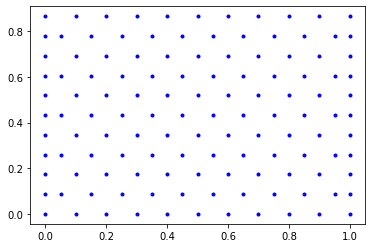

In [ ]:
for i in range(0,n_v,1):
    plt.scatter(V[i][0],V[i][1], color='b', marker='.')
plt.show()

In [3]:
Sol = np.genfromtxt("/home/s-janieb/BaThesisv2/DecCalc/solution.txt")
data = []
i = 0
while( V[i][1] == 0 ):
    i += 1
for j in range(0,i,1):
    arr = []
    for k in range(0,i,1):
        arr.append(Sol[k+i*j])
    data.append(arr)
bar = np.linspace(0,1,21)
X, Y = np.meshgrid(bar, bar)
#plt.contour( data)
plt.imshow( data, cmap='cividis',origin='lower', extent=(0,1,0,1))
plt.colorbar()
plt.show()

OSError: /home/s-janieb/BaThesisv2/DecCalc/solution.txt not found.